# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment.

In [1]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
!pip install nni

# Put the following code into the file at /content/Real-ESRGAN/realesrgan/utils.py from line 75 :

# import nni
# from nni.compression.pytorch.pruning import L1NormPruner
# from nni.compression.pytorch.pruning import LevelPruner
# config_list = [{
#       'sparsity_per_layer': 0.5,
#       'op_types': ['Conv2d']
#   }]
# pruner = LevelPruner(self.model, config_list)
# masked_model, masks = pruner.compress()
# self.model = masked_model


#---------------------------------------------------------


# You can use this code to download the onnx of the model:

# x = torch.randn(1, 3, 224, 224, requires_grad=True).cuda()
# torch.onnx.export(
#         self.model,  # model being run
#         x,  # model input
#         "./model.onnx",  # where to save the model
#         do_constant_folding=True,
#         input_names=['input'],  # the model's input names (an arbitrary string)
#         output_names=['output'],  # the model's output names (an arbitrary string)
#         opset_version=11  # XGen supports 11 or 9
#     )

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 755 (delta 5), reused 12 (delta 3), pack-reused 735
Receiving objects: 100% (755/755), 5.37 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (406/406), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 15.5 MB/s 
     |████████████████████████████████| 5.7 MB 41.3 MB/s 
     |████████████████████████████████| 190 kB 21.7 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=b3b661422e72efc5ecbb707214af9d6d75e1baced9854d2d9a49eed960889676
  Stored in directory: /root/.cache/pip/wheels/4d/d3/95/e17d0bcdd7dcfb0dbf79db006711e434c42036efbf6695ef7f
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [2]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images (you can upload the image i have shared in the google drive link)
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving JoJo_Part_1_Phantom_Blood.jpg to JoJo_Part_1_Phantom_Blood.jpg
move JoJo_Part_1_Phantom_Blood.jpg to upload/JoJo_Part_1_Phantom_Blood.jpg


# 3. Inference


In [36]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --face_enhance
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Testing 0 JoJo_Part_1_Phantom_Blood
Error Input type (torch.cuda.HalfTensor) and weight type (torch.cuda.FloatTensor) should be the same
If you encounter CUDA out of memory, try to set --tile with a smaller number.


# 4. Visualization

(311, 220, 3)
(311, 220, 3)
(311, 220, 3)
PSNR: 17.052916010619455


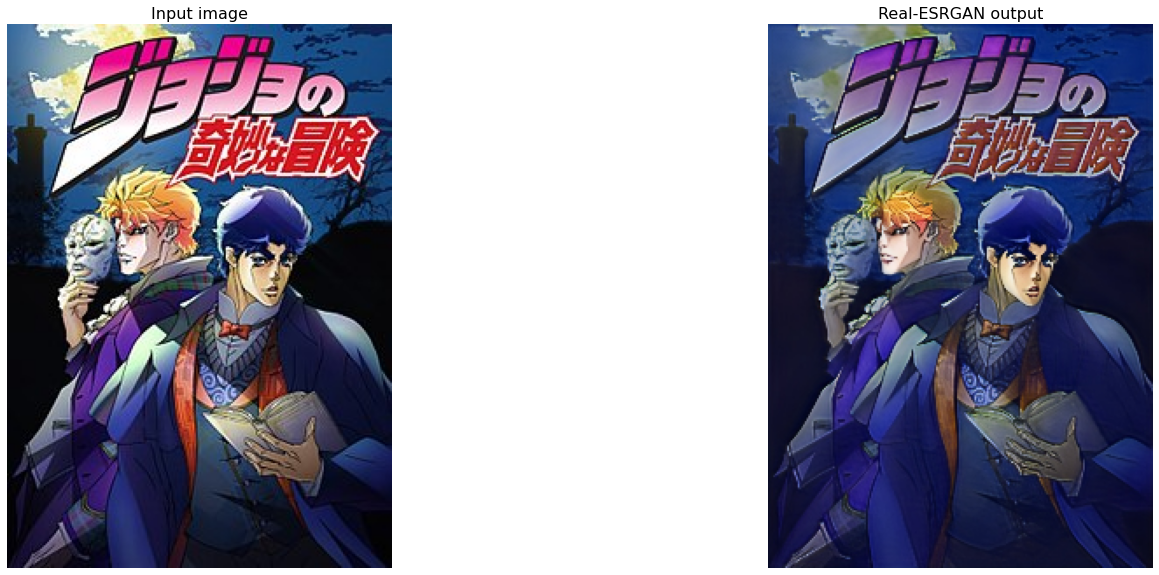

In [16]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  img_output = cv2.resize(img_output, (220,311))
  print(img_output.shape)
  display(img_input, img_output)
  print(img_input.shape)
  print(img_output.shape)
  psnr = cv2.PSNR(img_input, img_output)
  print("PSNR: {}".format(psnr))

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>